# 2.3.2: метод простой итерации

Локализовать корни уравнения $f(x)=0$ и найти их с точностью $\varepsilon=10^{-5}$, используя метод простой итерации. К виду $x=\varphi(x)$, удобному для итераций, уравнение $f(x)=0$ привести двумя способами.

a) Преобразовать уравнение в виду $x=x-\alpha f(x)$, где $\alpha=\cfrac{2}{M+m}, 0 < m \leqslant f^\prime (x) \leqslant M$, а $x$ принадлежит отрезку локализации $[a, b]$.

b) Любым другим преобразованием уравнения. Проверить достаточное условие сходимости метода. 


Использовать критерий окончания итерационного процесса вида $\vert x^{(n)} - x^{(n-1)} \vert < \cfrac{1-q}{q} \varepsilon$, где

в п. a) $q = \cfrac{M-m}{M+m}$,

в п. b) $q = \max\limits_{x \in [a, b]} \vert \varphi^\prime (x) \vert$.

Сравнить число итераций и значения величины $q$ в п. a), п. b).

# Метод простой итерации: теория

Метод простой итерации — один из простейших численных методов решения уравнений. Метод основан на принципе сжимающего отображения, который применительно к численным методам в общем виде также может называться методом последовательных приближений.

Чтобы применить метод простой итерации для решения нелинейного уравнения $f(x)=0$, необходимо преобразовать это уравнение к следующему виду:

$$x = \varphi(x).$$

Это преобразование (приведение к виду, удобному для итераций) можно выполнить разными способами. Функция $\varphi$ называется итерационной функцией.

Выберем каким-либо образом приближенное значение корня $x^{(0)}$ и подставим его в правую часть уравнения $x = \varphi(x).$ Получим значение $x^{(1)} = \varphi(x^{(0)})$. Подставляя теперь $x^{(1)}$ в правую часть уравнения $x = \varphi(x)$, имеем $x^{(2)} = \varphi(x^{(1)})$. Продолжая этот процесс неограниченно, получаем последовательность приближений к корню, вычисляемых по формуле

$$x^{(n+1)} = \varphi(x^{(n)}), \quad n \geqslant 0.$$

Если существует предел построенной последовательности $\bar{x} = \lim\limits_{n \to \infty} x^{(n)}$, то, переходя к пределу в равенстве $x^{(n+1)} = \varphi(x^{(n)})$ и предполагая функцию $\varphi$ непрерывной, получаем равенство

$$\bar{x} = \varphi(\bar{x}).$$

Это значит, что $\bar{x}$ - корень уравнения $x = \varphi(x)$.

# Критерий окончания

$$\vert x^{(n)} - x^{(n-1)} \vert < \cfrac{1-q}{q} \varepsilon.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize
from scipy.misc import derivative
%matplotlib inline

In [2]:
f = lambda x: np.exp(-x) - np.log10(1-x**2) - 2

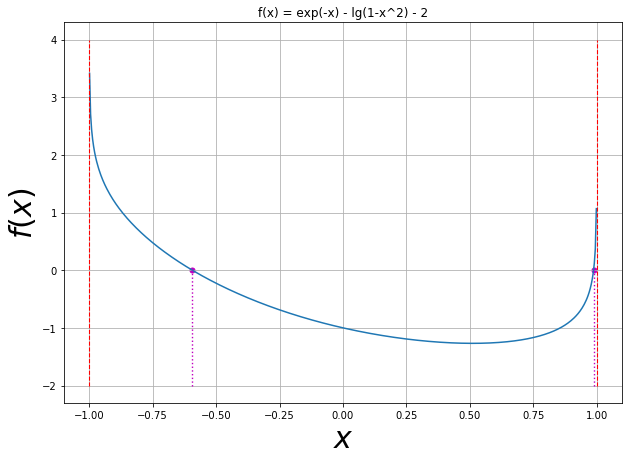

In [3]:
x, s = np.linspace(-0.999, 0.999, 500, retstep=True)
fx = np.exp(-x) - np.log10(1-x**2) - 2
fdx = -np.exp(-x) + (2*x)/((1-x**2)*np.log(10))
plt.figure(figsize=(10, 7))
plt.plot(x, fx)
plt.plot([-1, -1], [-2,  4], c='r', linestyle='--', linewidth = 1.1)
plt.plot([1, 1], [-2, 4], c='r', linestyle='--', linewidth = 1.1) # асимптоты для красоты
plt.plot([-0.5939, -0.5939], [-2, 0], c='m', linestyle=':', linewidth = 1.4)
plt.plot([0.9881, 0.9881], [-2, 0], c='m', linestyle=':', linewidth = 1.4) # линии от корней
plt.grid(True)
plt.xlabel(r'$x$', fontsize=30)
plt.ylabel(r'$f(x)$', fontsize=30)
plt.title('f(x) = exp(-x) - lg(1-x^2) - 2')
plt.scatter(0.9881, 0, c='m', s = 25)
plt.scatter(-0.5939, 0, c='m', s = 25)
#plt.scatter(x1, 0, c='r')

In [5]:
# x0 - начальное приближение
# alpha - 
# func - функция
# q - знаменатель геом. прогрессии, 0 <= q < 1
# eps - требуемая точность
def Fixed_point_iteration(x0, alpha, func, q, eps):
    x_k = x0 
    x_n = x_k - alpha * func(x_k)
    iters = 1 # считаем число итераций
    while np.abs(x_n - x_k) >= ((1 - q)/q)*eps:
        x_k = x_n
        x_n = x_k - alpha * func(x_k)
        iters += 1
    return (x_n, iters)

In [6]:
# отрезок локализации первого корня
a1 = -0.75
b1 = -0.25

# отрезок локализации второго корня
a2 = 0.85
b2 = 0.99

# Пункт a) 

Преобразовать уравнение к виду $x=x-\alpha f(x)$, где $\alpha = \cfrac{2}{M+m}$, 0 < $m$ < $\vert f^\prime (x) \vert$ < $M$, а $x$ принадлежит отрезку локализации  $[a, b]$.

## Первый отрезок локализации: $[-0.75, -0.25]$.

Приведем уравнение $f(x) = 0$ к виду $x = x - \alpha f(x)$ для корня на этом отрезке.

* Производная функции:

$f^\prime (x) = \cfrac{2 x}{(1-x^2) ln10} - e^x$.

* На концах отрезка: 

$f^\prime (-0.75) = -3.60601$,

$f^\prime (-0.25) = -1.51565$.

* Значит, $m = 1.51565$ и $M = 3.60601$. Тогда $\alpha = \cfrac{2}{M+m} = \cfrac{2}{3.60601 + 1.51565} = 0.390498$.

Выберем знак $\alpha$ таким образом, чтобы он соответствовал знаку производной функции $f(x)$ в окрестности корня: $\alpha = -0.390498$

* Значит, получим в итоге уравнение: 
$$x = x + 0.390498 \bigg(e^{-x}-lg(1-x^2)-2\bigg).$$

In [9]:
alpha1 = -0.390498
m1, M1 = 1.51565, 3.60601
q1 = (M1 - m1)/(M1 + m1)
eps = 1e-5
x0_1 = (a1+b1)/2
q1

0.4081411104993303

In [8]:
Fixed_point_iteration(x0_1, alpha1, f, q1, eps)

(-0.59392163282240007, 4)

## Второй отрезок локализации: $[0.85, 0.99]$.

Приведем уравнение $f(x) = 0$ к виду $x = x - \alpha f(x)$ для корня на этом отрезке.

* Производная функции:

$f^\prime (x) = \cfrac{2 x}{(1-x^2) ln10} - e^x$.

* На концах отрезка: 

$f^\prime (0.85) = 2.23313$,

$f^\prime (0.95) = 42.8396$.

* Значит, $m = 2.23313$ и $M = 42.8396$. Тогда $\alpha = \cfrac{2}{M+m} = \cfrac{2}{2.23313 + 42.8396} = 0.0443727$.

Выберем знак $\alpha$ таким образом, чтобы он соответствовал знаку производной функции $f(x)$ в окрестности корня: $\alpha = 0.0443727$

* Значит, получим в итоге уравнение: 
$$x = x - 0.0443727 \bigg(e^{-x}-lg(1-x^2)-2\bigg).$$

In [10]:
alpha2 = 0.0443727
m2, M2 = 2.23313, 42.8396
q2 = (M2 - m2)/(M2 + m2)
eps = 1e-5
x0_2 = (a2+b2)/2
q2

0.9009099293519606

In [11]:
Fixed_point_iteration(x0_2, alpha2, f, q2, eps)

(0.98814698792178302, 20)

# Пункт b) 

Любым  другим  преобразованием  уравнения. Проверить достаточное условие сходимости метода. 

In [12]:
def Fixed_point_iteration2(x0, func, q, eps):
    x_i = x0
    x_n = x_i + func(x_i)    
    iters = 1
    while np.abs(x_n - x_i) >= np.abs(((1 - q)/q)*eps):
        x_i = x_n
        x_n = x_i + func(x_i)
        #print(x_n)        
        iters += 1
    return (x_n, iters)

In [43]:
f3 = lambda x: 0.25*(np.exp(-x) - np.log10(1-x**2) - 2)
f4 = lambda x: -np.exp(-4*x)*(np.exp(-x) - np.log10(1-x**2) - 2)

In [44]:
# q для первой функции
q3 = np.max(np.abs(derivative(f3, np.linspace(a1, b1), dx = 0.001)))
q3

0.90150481492801138

$q_3 < 1$, достаточное условие выполняется

In [15]:
# q для второй функции
q4 = np.max(np.abs(derivative(f4, np.linspace(a2, b2), dx = 0.001)))
q4

0.8137279194964494

$q_4 < 1$, достаточное условие выполняется

In [45]:
Fixed_point_iteration2(-0.52, f3, q3, eps)

(-0.59392132847072687, 12)

In [17]:
Fixed_point_iteration2(0.95, f4, q4, eps)

(0.98814689128636402, 12)